In [583]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [584]:
#Load dataset and use a CSV file like 'healthcare_costs.csv'
data=pd.read_csv("healthcare_costs.csv")

In [585]:
#Preview
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         50 non-null     int64  
 1   Age               50 non-null     int64  
 2   BMI               50 non-null     float64
 3   SmokingStatus     50 non-null     object 
 4   ChronicCondition  50 non-null     object 
 5   AnnualCost        50 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


,PatientID,Age,BMI,AnnualCost
count,50.00000,50.000000,50.000000,50.000000
mean,1025.50000,51.860000,29.260000,10081.385200
std,14.57738,17.700467,6.101923,2575.747173
min,1001.00000,21.000000,18.800000,5150.220000
25%,1013.25000,40.000000,24.500000,8223.007500
50%,1025.50000,50.500000,29.900000,9978.370000
75%,1037.75000,67.500000,34.025000,11866.262500
max,1050.00000,79.000000,39.300000,17359.160000


In [586]:
# Clean the dataset and Check for missing values
print(data.isnull().values.any())
print(data.nunique())
print(data.isnull().sum())

False
PatientID           50
Age                 35
BMI                 42
SmokingStatus        2
ChronicCondition     2
AnnualCost          50
dtype: int64
PatientID           0
Age                 0
BMI                 0
SmokingStatus       0
ChronicCondition    0
AnnualCost          0
dtype: int64


In [587]:
data.shape

(50, 6)

#  Exploratory Data Analysis (EDA)

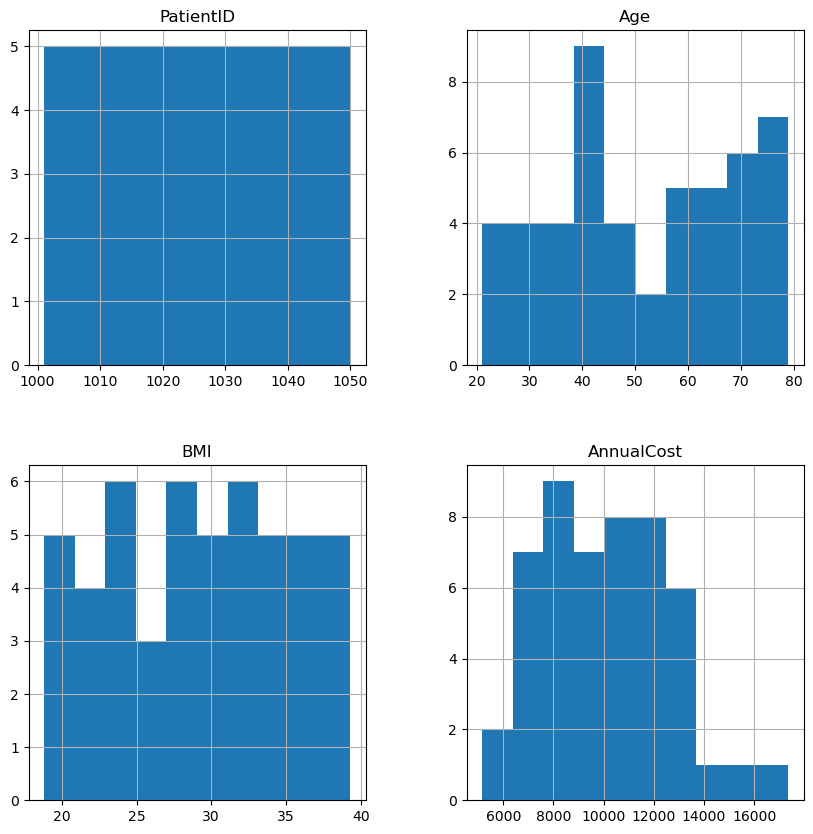

In [588]:
data.hist(bins=10,figsize=(10,10))
plt.show()

# Numerical feature distributions

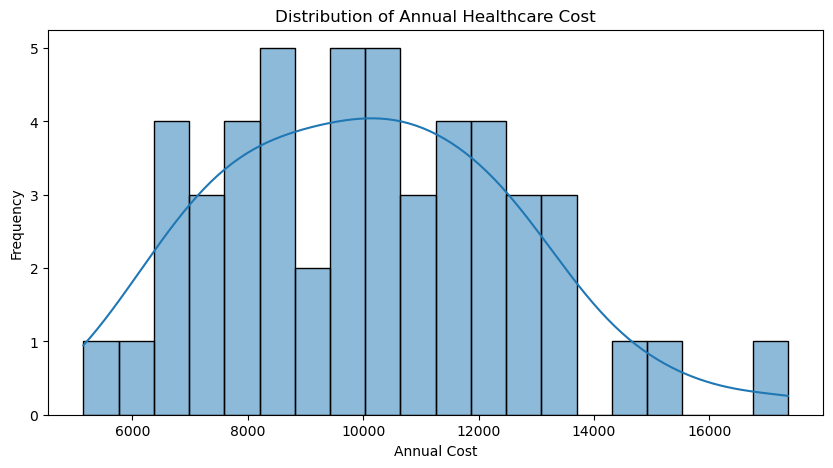

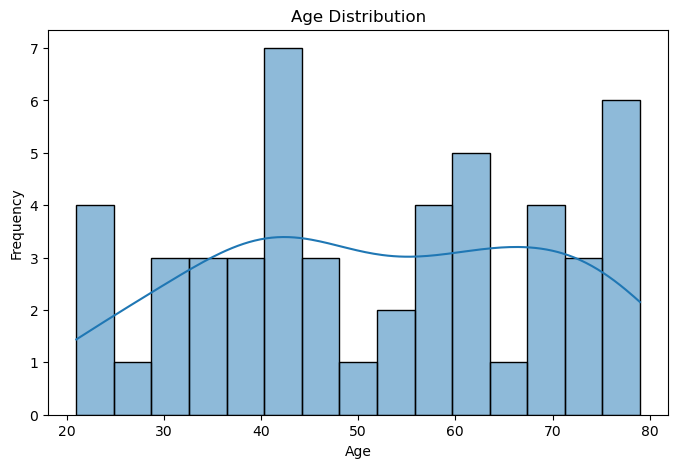

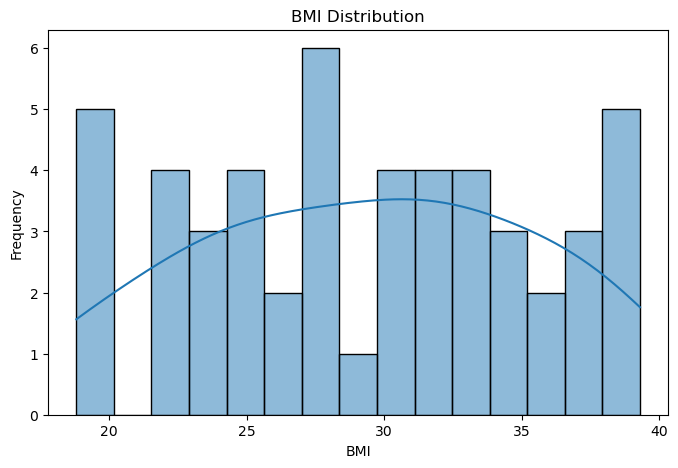

In [589]:
# Distribution of AnnualCost
plt.figure(figsize=(10,5))
sns.histplot(data['AnnualCost'], kde=True, bins=20)
plt.title('Distribution of Annual Healthcare Cost')
plt.xlabel('Annual Cost')
plt.ylabel('Frequency')
plt.show()
# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of BMI
plt.figure(figsize=(8,5))
sns.histplot(data['BMI'], kde=True, bins=15)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Categorical feature distributions

SmokingStatus
Smoker        29
Non-Smoker    21
Name: count, dtype: int64


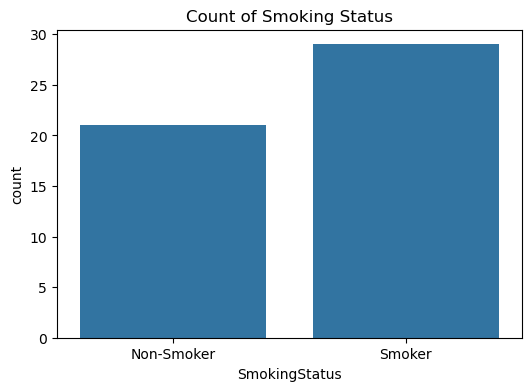

ChronicCondition
Yes    27
No     23
Name: count, dtype: int64


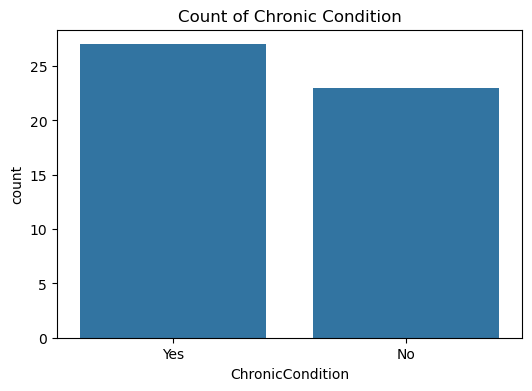

In [590]:
#Smoking status count
print(data["SmokingStatus"].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=data['SmokingStatus'])
plt.title("Count of Smoking Status")
plt.show()
# Chronic condition count
print(data["ChronicCondition"].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=data['ChronicCondition'])
plt.title("Count of Chronic Condition")
plt.show()


# Bivariate analysis

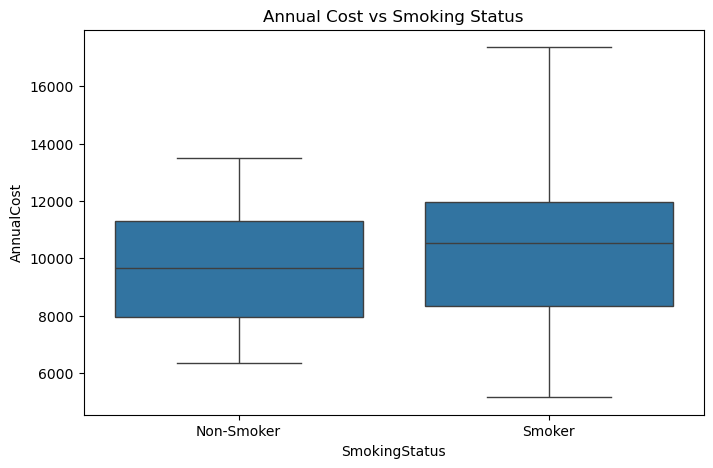

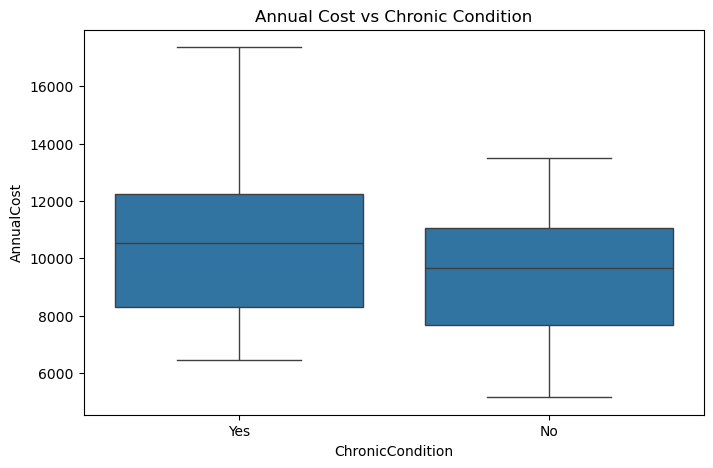

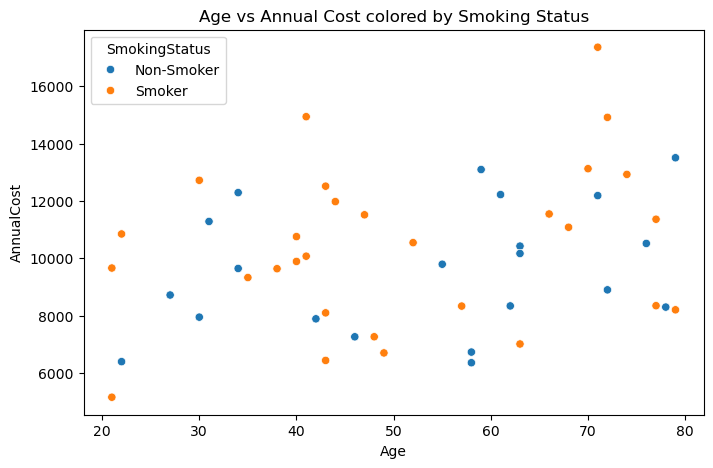

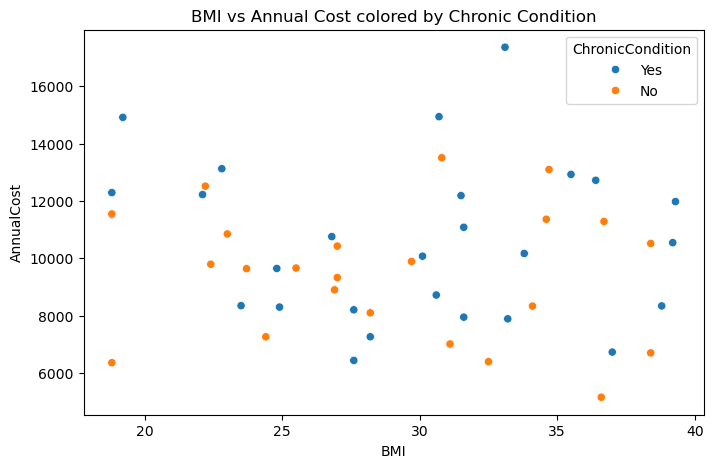

In [591]:
#Cost vs SmokingStatus
plt.figure(figsize=(8,5))
sns.boxplot(x='SmokingStatus', y='AnnualCost', data=data)
plt.title('Annual Cost vs Smoking Status')
plt.show()
# Cost vs ChronicCondition
plt.figure(figsize=(8,5))
sns.boxplot(x='ChronicCondition', y='AnnualCost', data=data)
plt.title('Annual Cost vs Chronic Condition')
plt.show()
# Age vs Cost
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='AnnualCost', hue='SmokingStatus', data=data)
plt.title('Age vs Annual Cost colored by Smoking Status')
plt.show()

# BMI vs Cost
plt.figure(figsize=(8,5))
sns.scatterplot(x='BMI', y='AnnualCost', hue='ChronicCondition', data=data)
plt.title('BMI vs Annual Cost colored by Chronic Condition')
plt.show()

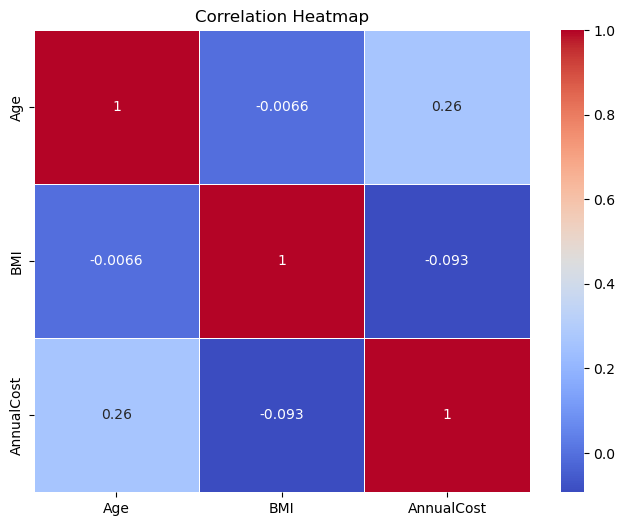

In [592]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[['Age', 'BMI', 'AnnualCost']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [593]:
#Converting Smoking Status and Chronic Condition to Numeric Codes(0/1)
data['SmokingStatus'] = data['SmokingStatus'].map({'Non-Smoker': 0, 'Smoker': 1})
data['ChronicCondition'] = data['ChronicCondition'].map({'No': 0, 'Yes': 1})

In [611]:
data.head()

,PatientID,Age,BMI,SmokingStatus,ChronicCondition,AnnualCost
0,1001,58,37.0,0,1,6725.12
1,1002,71,33.1,1,1,17359.16
2,1003,48,28.2,1,1,7259.34
3,1004,34,18.8,0,1,12287.21
4,1005,62,38.8,0,1,8334.85


In [612]:
# Drop PatientID (not predictive)
df_model = data.drop(columns=['PatientID'])
#Encoding categorical columns (if any)
df= pd.get_dummies(df_model , drop_first=True)

In [613]:
df.head()

,Age,BMI,SmokingStatus,ChronicCondition,AnnualCost
0,58,37.0,0,1,6725.12
1,71,33.1,1,1,17359.16
2,48,28.2,1,1,7259.34
3,34,18.8,0,1,12287.21
4,62,38.8,0,1,8334.85


In [595]:
# Create bins for AnnualCost
df['cost_bin'] = pd.qcut(df['AnnualCost'], q=5, labels=False)

In [596]:
# Feature and target split
X = df.drop(columns=['AnnualCost', 'cost_bin'])  # Drop ID and bin
y = df['AnnualCost']

In [597]:
#Train-test split 80 and 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['cost_bin']
)

In [598]:
X_train.columns

Index(['Age', 'BMI', 'SmokingStatus_1', 'ChronicCondition_1'], dtype='object')

In [599]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [600]:
X_train.shape


(40, 4)

# Model Training and Metrics

In [601]:
#  Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"MAE: {mae_lr:.2f}")
print(f"MSE:{ mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

MAE: 1702.18
MSE:4394722.60
RMSE: 2096.36
R² Score: -0.03


In [602]:
rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_rf_default = rf_default.predict(X_test)

mae_rf_default = mean_absolute_error(y_test, y_pred_rf_default)
mse_rf_default = mean_squared_error(y_test, y_pred_rf_default)
rmse_rf_default = np.sqrt(mse_rf_default)
r2_rf_default = r2_score(y_test, y_pred_rf_default)

print(f"MAE: {mae_rf_default:.2f}")
print(f"MSE: {mse_rf_default:.2f}")
print(f"RMSE: {rmse_rf_default:.2f}")
print(f"R² Score: {r2_rf_default:.2f}")

MAE: 1572.26
MSE: 3903817.45
RMSE: 1975.81
R² Score: 0.09


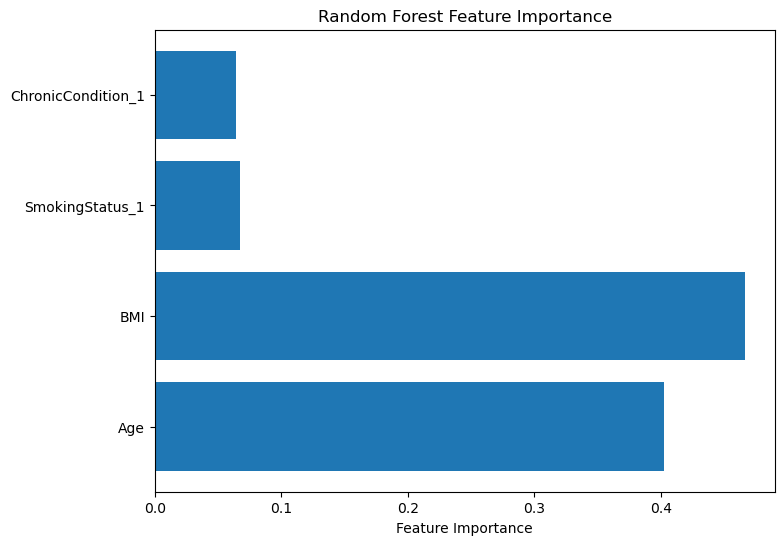

In [614]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns 

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [604]:
# Define your parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # or 'r2' if you prefer
    n_jobs=-1,               # Use all CPU cores
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

print("Best parameters found:", grid_search.best_params_)

# Predict using best model
y_pred_rf_tuned = best_rf.predict(X_test)

mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
# Evaluate
print(f"MAE: {mae_rf_tuned:.2f}")
print(f"MSE: {mse_rf_tuned:.2f}")
print(f"RMSE: {rmse_rf_tuned:.2f}")
print(f"R² Score: {r2_rf_tuned:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
MAE: 1551.79
MSE: 3263493.95
RMSE: 1806.51
R² Score: 0.24


In [605]:
# Summary table
summary_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest (Default)', 'Random Forest (Tuned)'],
    'MAE': [mae_lr, mae_rf_default, mae_rf_tuned],
    'MSE': [mse_lr, mse_rf_default, mse_rf_tuned],
    'RMSE': [rmse_lr, rmse_rf_default, rmse_rf_tuned],
    'R2': [r2_lr, r2_rf_default, r2_rf_tuned]
})

print(summary_df)

                     Model          MAE           MSE         RMSE        R2
0        Linear Regression  1702.181487  4.394723e+06  2096.359367 -0.025838
1  Random Forest (Default)  1572.255340  3.903817e+06  1975.808050  0.088752
2    Random Forest (Tuned)  1551.792672  3.263494e+06  1806.514310  0.238219


C:\Users\Home\AppData\Local\Temp\ipykernel_11580\469872410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=summary_df, palette='viridis')


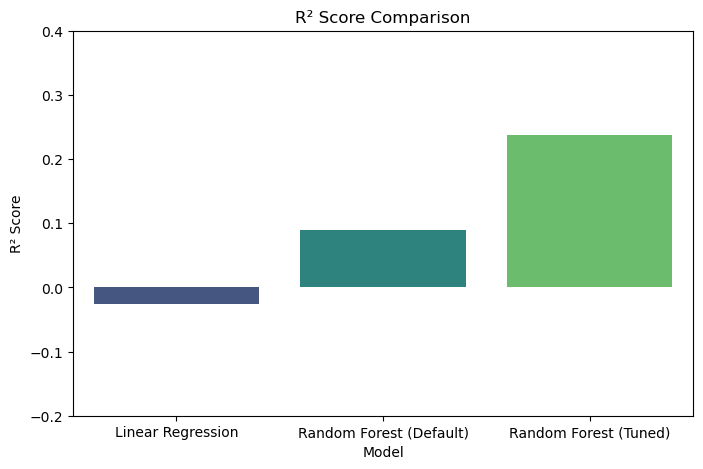

In [606]:
# Plot R² comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2', data=summary_df, palette='viridis')
plt.title('R² Score Comparison')
plt.ylim(-0.2, 0.4)
plt.ylabel('R² Score')
plt.show()

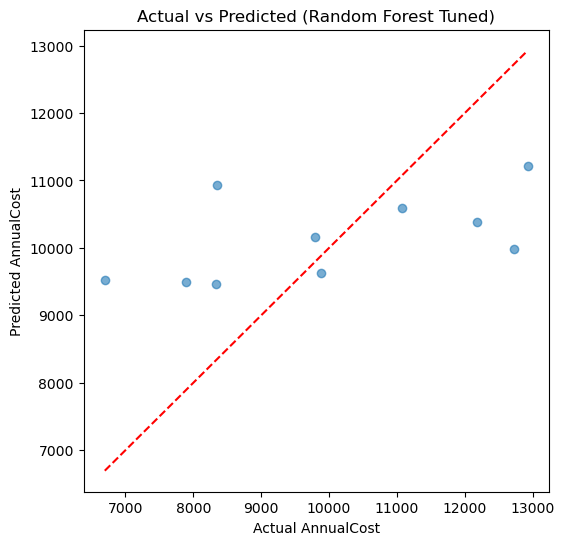

In [607]:
# Plot Actual vs Predicted (for best model)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf_tuned, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual AnnualCost')
plt.ylabel('Predicted AnnualCost')
plt.title('Actual vs Predicted (Random Forest Tuned)')
plt.show()